In [1]:
import pandas as pd # type: ignore
from sklearn.datasets import load_iris # type: ignore
iris = load_iris()

In [ ]:
iris.feature_names

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Adding the target column in to the dataframes

df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris.target_names

# So we three taget names 0 defines the setosa, 1 defines the versicolor, 2 defines the virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df[df.target == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

# From 1-50 the target is setosa, 50-100 is versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
# Now we do a transformation and assign the flower name to the respective target based on their numbers.
# lambda is small function that do the tranformation and assign the flower name to the corresponding number.

df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
df0 = df[df.target == 0] # green
df1 = df[df.target == 1] # blue
df2 = df[df.target == 2] # red

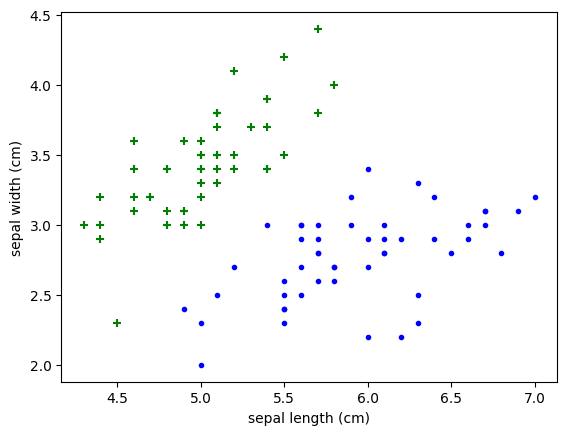

In [10]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')

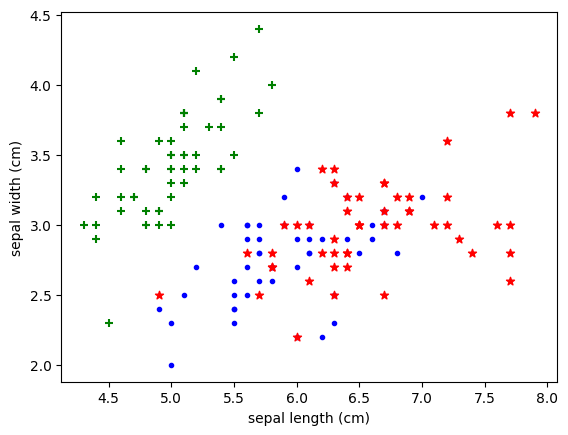

In [11]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='*')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['target', 'flower_name'], axis= 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
len(X_train) 

120

In [44]:
len(X_test)

30

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
knn.score(X_test, y_test)

1.0

In [41]:
from sklearn.metrics import confusion_matrix # type: ignore

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]], dtype=int64)

Text(58.222222222222214, 0.5, 'True Values')

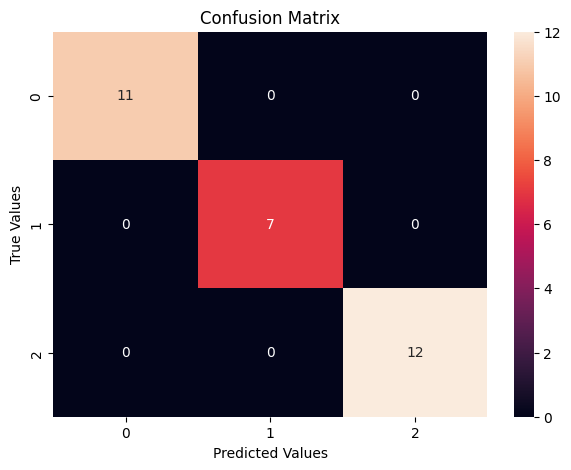

In [43]:
import seaborn as sn # type: ignore
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [46]:
from sklearn.metrics import classification_report # type: ignore
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

